<a href="https://colab.research.google.com/github/Jimin980921/Gan/blob/master/Gan_0310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gan 개념, 논문공부

In [0]:
#https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8935337

illumination: 빛,조명

ambient:주위의

inevitably:필연적으로

venous:정맥의

deformation:변형

atmospheric:대기의

susceptible:민감한

bifurcation:분기점

termination:종료

robust:튼튼한

augmentation:증가,확대

contour:윤곽

phalangeal joint:지절관절

nascent:초창기의

unilateral:일방적

stochastic:통계적

skeleton-based methods:정맥망과 배경의 대비를 강화하기위해 대조기반기법이 제안되었다. 복원된 손가락정맥이미지를 얻기위해 대기 산란 모델을 적용했다. blurr된 이미지에서 정맥망을 추출함.

minutiae-based methods: 손가락 이동, 회전에 매우 민감하기 때문에, 회전에 변치않는 minutiae-based-methods가 인지 정확도를 높이기위해서 제안되고있다.
Local binary pattern(LBP),local line binary pattern(LLBP),pyramid histogram of double competitive pattern(PHDCP)가 지역통계적정보를 이용하여 정맥 패턴을 암호화한다. 정맥의 분기점과 끝점을 이용하여 키포인트 추출한다. SIFT는 회전과 이동에 더 강한 minute feature을 얻는것에 사용된다..
=> 노이즈에 약함.

# 샘플 증가
1.실제 시나리오에서 발생한 변형현상을 시뮬레이션하는 고전적인 증가기법을 사용하여 샘플을 증가시킨다.

2.고전적 확대 기법을 사용하여 생성된 샘플을 사용하여 제안된 FCGAN을 활용하여 샘플을 추가적으로 증가시킨다.

# **전처리**
1)ROI

-원래 손가락 정맥이미지와 확장된 roi이미지(사이즈는 고정)

-CNNS 훈련에대한 input으로 손가락 정맥 ROI를 사용하는 장점

 1.CNN의 분류 안정성을 향상시킬 수 있는 ROI 확장 방법을 사용하여 변형되었다.
 
 2.대부분 무관한 부분이 여과되고 1차 정맥 패턴이 보존되어 있어 훈련 과정을 효과적으로 개선할 수 있다.





# **FCGAN의 주요 기여 3가지**

1.global polling은 discriminator 네트워크에 통합되어, 대표적인 특징을 추출하고, 제안된 FCGAN의 융합을 가속화할 수 있는 penalty term을 구축하는 것을 지원한다. 

2. generator 네트워크는 deconvolution operation에 유도되는 grid효과를 저항하는 완전한 convolution 네트워크로 설계된다.

3. 합성 batch 정규화(PBN) 방식은 합성샘플의 다양성을 개선시키는 generator 네트워크에 사용되고 제시된다. 

# Generator, Discriminator network


In [0]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving KakaoTalk_20200310_213608226.png to KakaoTalk_20200310_213608226.png
User uploaded file "KakaoTalk_20200310_213608226.png" with length 261352 bytes


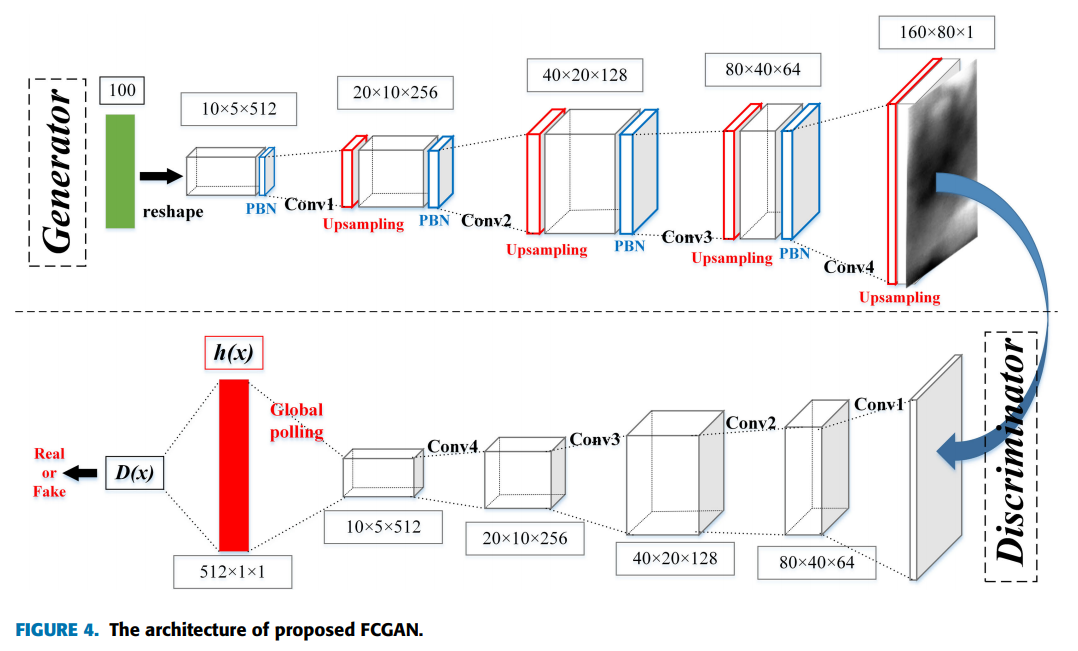

In [0]:
from IPython.display import Image
Image('KakaoTalk_20200310_213608226.png')

제안된 FCGAN에서, 

generator 네트워크는 4-convolution layer(3*3kernel size),4 up-sampling layers,4 BPN layers로 이루어져있다.

ReLu함수는 tahn함수를 이용하는 최종 레이어 이외의 각 레이어의 활성화함수로 사용된다. 그리고 convolution의 stride와 padding은 둘다 1로 세팅한다.

discriminator 네트워크는 4-convolution layer(3*3kernel size),1개의 global polling layer(10*5 kernel size)로 이루어져있다. ReLu함수는 시그모이드 함수를 이용하는 최종 레이어 이외의 각 레이어의 활성화함수로 사용된다. 그리고  그리고 convolution의 stride와 padding은 둘다 2로 세팅한다.

# **FULLY CONVOLUTION**
위에서 논의한 바와 같이, DCGAN는 generator 네트워크에서 큰 stride(stride > 1)의 deconvolution 연산으로 인해 합성 영상에서 그리드 효과를 유도할 가능성이 있다. 그러므로 우리는 grid 문제를 완화하기 위한 generator로서 작은 stride(stride = 1)을 가진 완전한 convolutional network를 설계한다. 효과적인 up-sampling방법은 완전한 convolution 실현가능성을 보장하기 위해 수행된다. 

-up-sampling:

up-sampling레이어의 각 출력을 처리하기위해 convolution layer가 사용된다.
convolution kernel과 stride는 모두 작은 사이즈로 설정된다.(3*3 또는 1). 이것은 generator의 복잡성을 줄이고, feature maps의 detail을 유지하는것에 이점이 있다.(큰 convolution kernel,stride를 비교하면)



# **PRELIMINARY BATCH NORMALIZATION**

미니배치 샘플의 경우, 같은 평균값과 표준편차를 사용한다. 이것은 generator 네트워크가 동일한 tone의 샘플을 합성하고, 합성샘플의 다양성을 저하시는 경향이 있다.

PBN은 generator 네트워크에서 배치 정규화에의해 만들어지는 문제를 해결하기위해 제시되었다. 




# **TRAINING PROCESS**
FCGAN은 각 범주에대한 손가락 정맥을 생성하기위해 train된다. train과정은 generator와 discriminator가 교대로 수행된다. mini-batch는 60으로 설정되며, 가중치는 0.01의 표준분포와 표준화된 정규분포를 사용하므로 초기화된다. adam optimizer를 사용하여 확률적 경사하강법을 사용한다.

# **CNN FRAMEWORK**


In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving KakaoTalk_20200311_001247235.png to KakaoTalk_20200311_001247235.png
User uploaded file "KakaoTalk_20200311_001247235.png" with length 191014 bytes


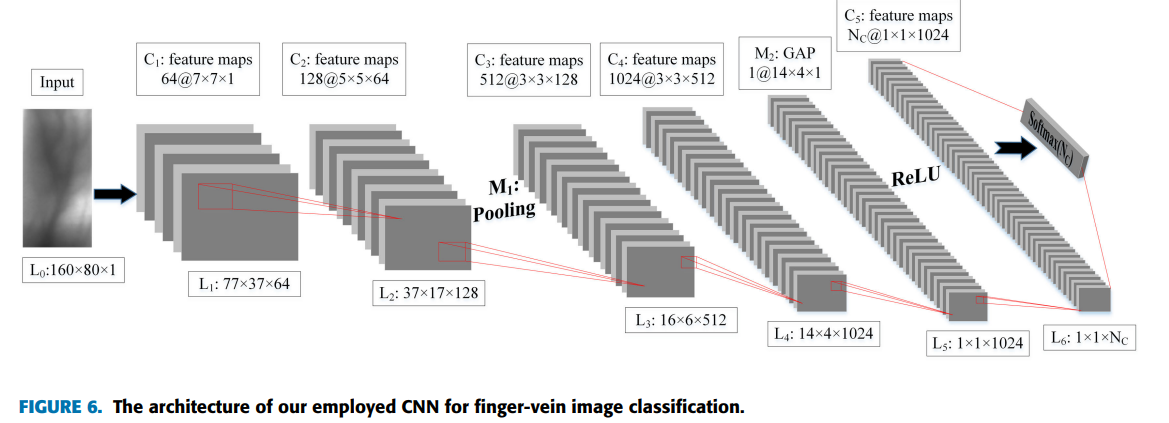

In [2]:
from IPython.display import Image
Image('KakaoTalk_20200311_001247235.png')

In [3]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving KakaoTalk_20200311_005517460.png to KakaoTalk_20200311_005517460.png
User uploaded file "KakaoTalk_20200311_005517460.png" with length 74853 bytes


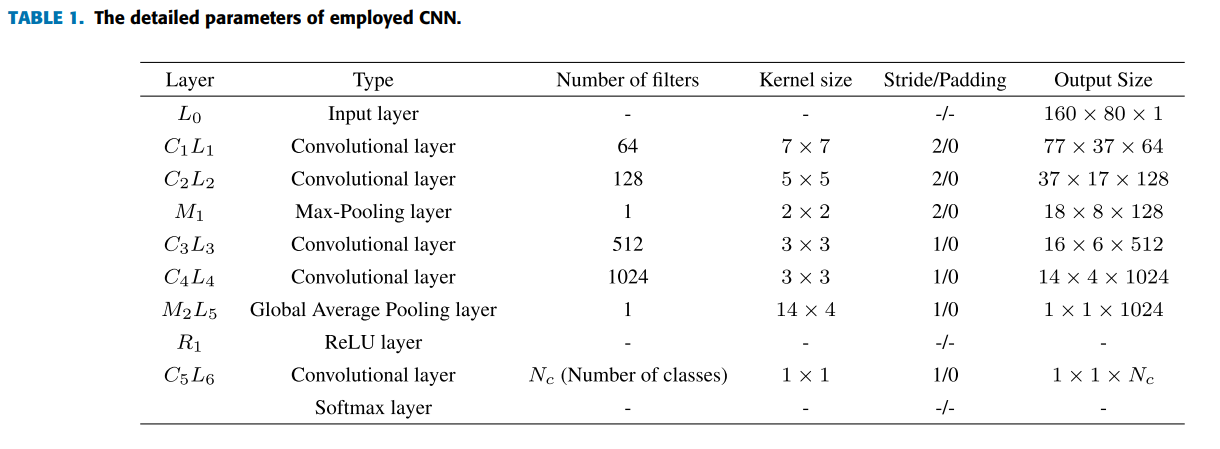

In [4]:
from IPython.display import Image
Image('KakaoTalk_20200311_005517460.png')

손가락 정맥 분류 CNN system은 위 사진이다,
CNN network는 5개의 convolution layer, 2개의 pooling layer, 1개의 RELU, 1개의 softmax layer로 구성되어있다. 

**CNN** **topoloy**
**Convolution** **Layer**:처음 두개의 convolution layer에서, 더 큰 kernel size(7X7X1, 5X5X1)를 사용하여 더 넓은 vision을 확보한다. 이것은 손가락 정맥이미지의 변형과 displacement에의해 발생하는 거짓거부율을 감소시킬 수 있다. 
더 넓은 stride는 pooling layer의 대체하는 역할을 하기위해 사용된다.이것은 overfitting을 막고, input이미지의 차원을 줄이는 것을 가능하게한다. 후자의 convolution layer에서는 작은 convolution kernel size(3X3X1)가 더 대표적인 특징을 얻으므로써, 네트워크의 분류정확성을 개선시킨다.

**pooling** **layer**:layer의 깊이가 증가하면, 모든 convolution kernel layer의 커널수가 빠르게 증가하고, 상응하는 매개변수도 급격하게 증가한다. 과한 매개변수에의해 생긴 부정적인 영향을 줄이기위해, 크기(14X4X1)의 global pooling은 1024차원의 특징벡터를 얻는 L5 layer에서 도입되었다. 1024차원의 특징벡터는 완전연결layer L6에의해 구성된 분류기에 입력된다. input 손가락 정맥이미지가 특정 범주에 속할 가능성을 예측하기위해 softmax로 끝이난다.

**training** **process**:input 손가락 정맥이미지는 완전히 ROI로 잘라져 160*80크기로 고정된다. training process에서, mini-batch와 학습률은 30epochs당 64와 0.0001로 정해진다. RELU활성화 함수를 이용하고, adam optimizer를 이용한 확률적 경사하강법을 사용한다.

overfitting을 줄이기위해서, 완전연결layer L6에 확률 0.75의 dropout기법을 사용한다.

# **EXPERIMENTS**
손가락 정맥 합성이미지의 질의 향상 및 CNN의 recognition results의 개선에 관한 FCGAN의 성능평가를 위한 실험이 진행된다.
(tensorflow로 구현됨)

DCGAN,SAGAN과 FCGAN을 비교한다.

-합성 손가락정맥이미지의 질 비교

-손가락정맥이미지의 인지 정확성 개선 비교


**분류** **성능** **평가**

샘플은 한번씩 증가한다. 분류결과는 얻어진다. 한 기간에 동일한 양의 샘플이 모든 손가락정맥 category에 추가되어서 다른 손가락 정맥 category사이에서 training sample의 균형을 맞춰준다.


고전적인 샘플 증가를 수행할때, GAN 기반 방법을 사용하여 카테고리당 500개의 합성 영상이 생성되며, 500개의 영상을 10개의 서로 배타적인 그룹으로 무작위로 나눈다.




In [7]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving a.PNG to a.PNG
User uploaded file "a.PNG" with length 59504 bytes


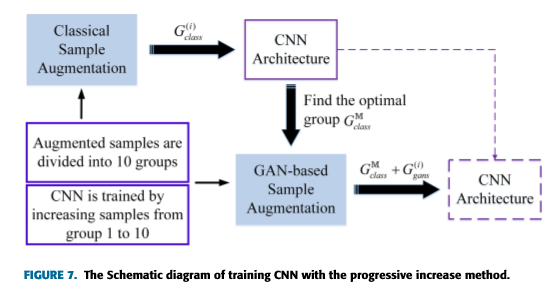

In [8]:
from IPython.display import Image
Image('a.PNG')

FCGAN은 여러부분에서 성능이 뛰어나다.
FCGAN과 CNN은 dense layer를 대체하기 위해 global pooling layer를 사용한다. 이는 매개변수 크기를 크게 줄이고 overfitting의 위험을 줄일 수 있다.

# **CONCLUSION**
Gan기반 FCGAN은 손가락정맥이미지 증가를 위해서 완전convolutional 네트워크를 사용하며, 제한된 손실 함수를 사용한다.

1. 분류 정확도에 손가락 위치가 미치는 부작용을 약화시키기위해, 정확히 phalangeal 관절을 찾고, 잘 보정된 손가락 정맥 ROIS를 위해 강한 gradient기반 접근법을 적용한다.
 large-stride convolution layer는 더 넓은 시야를 얻고, 손가락 정맥위치에의한 잘못된 거부율을 낮추는 CNN을 적용한다.


2. FCGAN은 deconvolution operation으로 인해 발생한 grid effect를 줄이기위해 작은 stride를 사용하는 완전 convolutional 네트워크로 설계된다.
preliminary batch 정규화는 합성 샘플의 다양화를 개선하는 FCGAN에 사용된다.
GAN의 training process동안 합성샘플의 질 향상시키고, 일방적인 불균형을 줄인다. FCGAN에는 제한된 손실 함수를 사용한다.
합성 손가락정맥이미지의 질,손가락정맥이미지의 인지 정확성 개선 등에 대해 검증을 진행한다.


